In [7]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

## Plot a map and its downsized version, can zoom in on the lower left corner of both

In [13]:
zoom_in = True  # set to True if wish to plot zoomed-in maps, to False to get full maps

# read map data and put into 'data'
workPath = 'n/holyscratch01/dvorkin_lab/Users/tianliwang/'
mapPath = workPath+'maps_unzipped/'
hdulist = fits.open(mapPath+'Om0.183_si0.958/WLconv_z1.00_0400r.fits')  # choosing a sample map from the (0.183, 0.958) cosmo
data = hdulist[0].data

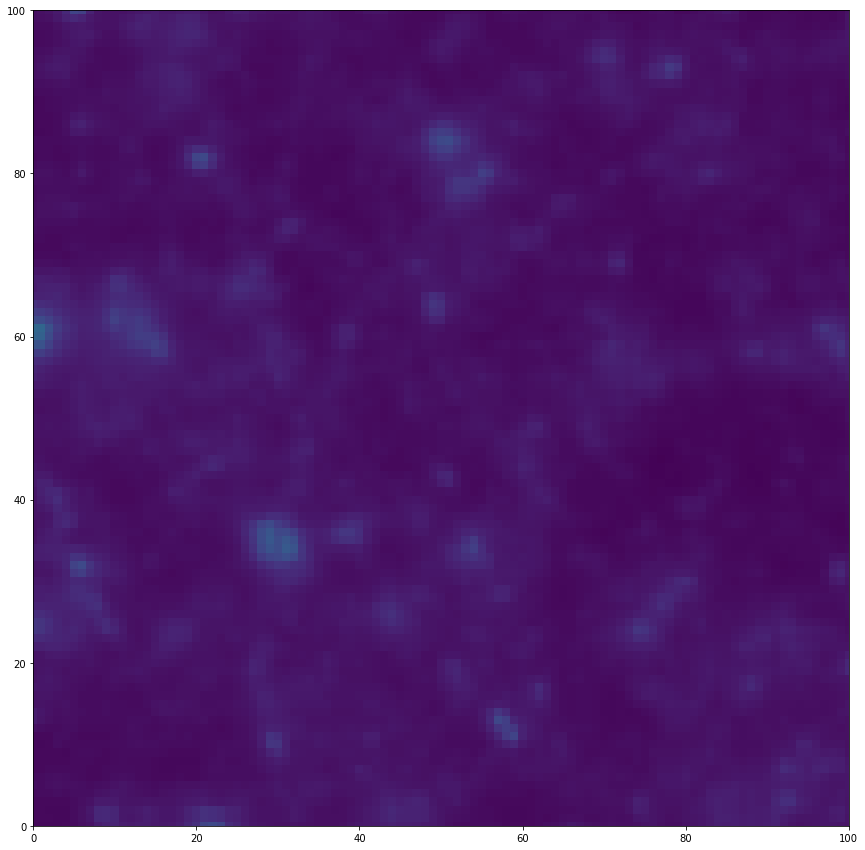

In [14]:
# plot the original map

matplotlib.rcParams['figure.figsize'] = [15, 15]
if zoom_in:
    zoom_lim = 100  # area (pixel number on one side) to zoom in
    plt.xlim(0,zoom_lim)
    plt.ylim(0,zoom_lim)

plt.imshow(data, origin='lower')
# plt.savefig(workPath+'example_map_zoomin.png', dpi=600)

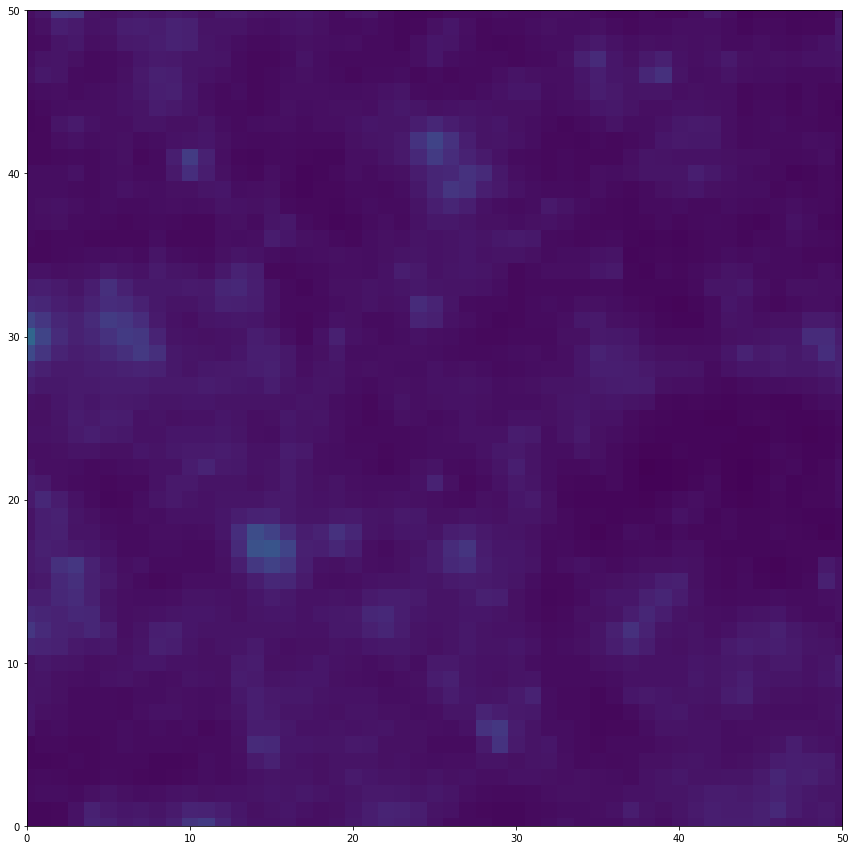

In [15]:
# downsize and show the map

l_original = int(data.shape[0])
l_downsized = int(l_original/2)
image_downsized = data.reshape([l_downsized, l_original//l_downsized, 
                                l_downsized, l_original//l_downsized]).mean(3).mean(1)

if zoom_in:
    plt.xlim(0,zoom_lim/2)
    plt.ylim(0,zoom_lim/2)
    
plt.imshow(image_downsized, origin='lower')
# plt.savefig(workPath+'example_map_downsized_zoomin.png', dpi=600)

## Check if CNN predictions of each map are Gaussian (to justify the assumed Gaussian Bayesian evidence)

In [11]:
n_cosmo=90
data_cnn = np.genfromtxt(workPath+'fullNet_testing_shuffle.dat', names=True, dtype=None)

Om_pred = data_cnn['Om_pred']
si_pred = data_cnn['si_pred']

origdata_cnn = np.reshape(np.array([Om_pred, si_pred]).T, (n_cosmo, 128, -1))

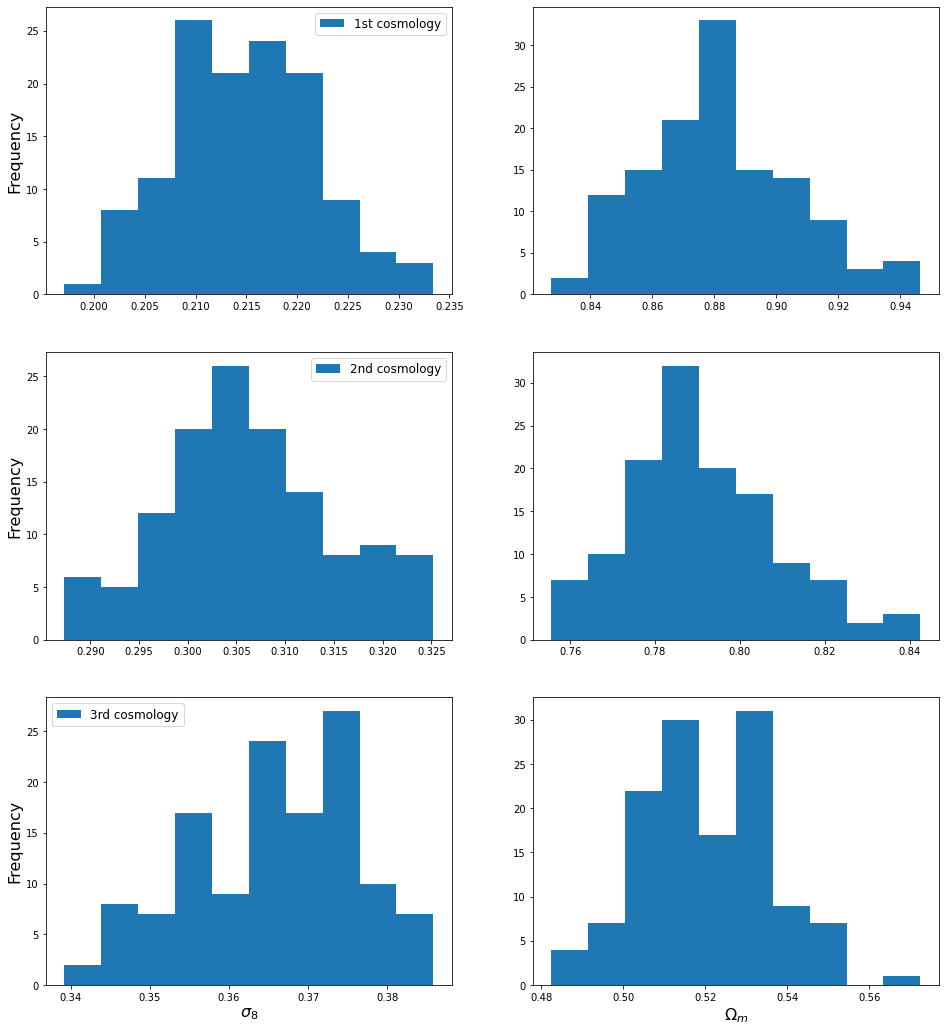

In [12]:
f = plt.figure(figsize=(16,18))
ax1 = f.add_subplot(3,2,1)
ax2 = f.add_subplot(3,2,2)
ax3 = f.add_subplot(3,2,3)
ax4 = f.add_subplot(3,2,4)
ax5 = f.add_subplot(3,2,5)
ax6 = f.add_subplot(3,2,6)

ax1.hist(origdata_cnn[0,:,0], bins=10, label='1st cosmology')
ax1.set_ylabel('Frequency', fontsize=16)
ax1.legend(fontsize=12)
ax2.hist(origdata_cnn[0,:,1], bins=10)

ax3.hist(origdata_cnn[1,:,0], bins=10, label='2nd cosmology')
ax3.set_ylabel('Frequency', fontsize=16)
ax3.legend(fontsize=12)
ax4.hist(origdata_cnn[1,:,1], bins=10)

ax5.hist(origdata_cnn[2,:,0], bins=10, label='3rd cosmology')
ax5.set_xlabel(r'$\sigma_8$', fontsize=16)
ax5.set_ylabel('Frequency', fontsize=16)
ax5.legend(fontsize=12)
ax6.hist(origdata_cnn[2,:,1], bins=10)
ax6.set_xlabel(r'$\Omega_m$', fontsize=16)

plt.savefig(workPath+'check_pred_gaussian_3cosmos.png', dpi=300)